In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                                                                                        

In [2]:
sns.set_context('talk')

# Lectura de Datos

In [3]:
folder = '../../SparkFireSims/data/post_proc/input/'

file_name = os.path.join(#folder,
                         'sims_likelihood.csv')
df = pd.read_csv(file_name)
df.reset_index(inplace=True, drop=True)
df['condition'] = pd.Categorical(df['condition'], categories=['SL','SH', 'FL', 'FH'], ordered=True)

df.set_index(['tile','condition','phase']).head(12)

emas_id       X        Y      provincia  \
tile condition phase                                            
4049 SL        3          307  791500  6242500  CARDENAL CARO   
               4          307  791500  6242500  CARDENAL CARO   
               5          307  791500  6242500  CARDENAL CARO   
     SH        3          307  791500  6242500  CARDENAL CARO   
               4          307  791500  6242500  CARDENAL CARO   
               5          307  791500  6242500  CARDENAL CARO   
     FL        3          307  791500  6242500  CARDENAL CARO   
               4          307  791500  6242500  CARDENAL CARO   
               5          307  791500  6242500  CARDENAL CARO   
     FH        3          307  791500  6242500  CARDENAL CARO   
               4          307  791500  6242500  CARDENAL CARO   
               5          307  791500  6242500  CARDENAL CARO   

                                         region  num_events  H_tile    H_prov  \
tile condition phase                                                            
4049 SL        3      LIBERTADOR GENERAL BERNAR         0.0     0.0  0.025862   
               4      LIBERTADOR GENERAL BERNAR         0.0     0.0  0.025862   
               5      LIBERTADOR GENERAL BERNAR         0.0     0.0  0.025862   
     SH        3      LIBERTADOR GENERAL BERNAR         0.0     0.0  0.043103   
               4      LIBERTADOR GENERAL BERNAR         0.0     0.0  0.043103   
               5      LIBERTADOR GENERAL BERNAR         0.0     0.0  0.043103   
     FL        3      LIBERTADOR GENERAL BERNAR         0.0     0.0  0.004926   
               4      LIBERTADOR GENERAL BERNAR         0.0     0.0  0.004926   
               5      LIBERTADOR GENERAL BERNAR         0.0     0.0  0.004926   
     FH        3      LIBERTADOR GENERAL BERNAR         0.0     0.0  0.001232   
               4      LIBERTADOR GENERAL BERNAR         0.0     0.0  0.001232   
               5      LIBERTADOR GENERAL BERNAR         0.0     0.0  0.001232   

                         H_reg     H_nat         H  transition_prob_from_prev  \
tile condition phase                                                            
4049 SL        3      0.006335  0.418605  0.010562                   1.000000   
               4      0.006335  0.418605  0.010562                   0.047161   
               5      0.006335  0.418605  0.010562                   0.114769   
     SH        3      0.011765  0.117922  0.012035                   1.000000   
               4      0.011765  0.117922  0.012035                   0.087000   
               5      0.011765  0.117922  0.012035                   0.195656   
     FL        3      0.001207  0.010317  0.001318                   1.000000   
               4      0.001207  0.010317  0.001318                   0.076159   
               5      0.001207  0.010317  0.001318                   0.115182   
     FH        3      0.000603  0.006167  0.000423                   1.000000   
               4      0.000603  0.006167  0.000423                   0.078057   
               5      0.000603  0.006167  0.000423                   0.129266   

                             S            Q           q         h  \
tile condition phase                                                
4049 SL        3      0.952839  4236.117525  302.579823  0.000002   
               4      0.041749  4236.117525  302.579823  0.000002   
               5      0.005413  4236.117525  302.579823  0.000002   
     SH        3      0.913000   660.124025   47.151716  0.000018   
               4      0.069978   660.124025   47.151716  0.000018   
               5      0.017022   660.124025   47.151716  0.000018   
     FL        3      0.923841    42.464119    3.033151  0.000031   
               4      0.067387    42.464119    3.033151  0.000031   
               5      0.008772    42.464119    3.033151  0.000031   
     FH        3      0.921943    10.294332    0.735309  0.000041   
             

In [4]:
df.shape

(416412, 23)

In [5]:
len(df['tile'].unique())

34701

In [6]:
len(df['condition'].unique())

4

# Ejercicios

<font size="3">

**Ejercicio 1:** Desplegar y plotear $N_{R,c}^p$ definido en la Ecuación (4) del documento *lab_modelamiento_utfsm* y donde $R$ es el conjunto de todas las celdas de ignición.
    
</font>

In [4]:
df_N = df[['condition','phase','N']].groupby(by=['condition','phase']).sum()
display(df_N)

N
condition phase            
SL        3      988.383214
          4       43.469303
          5        5.718912
SH        3      268.563422
          4       19.965112
          5        3.756551
FL        3       23.023450
          4        1.688071
          5        0.261209
FH        3       13.320345
          4        0.999775
          5        0.320266

In [5]:
def annotate(**kwargs):
    g=plt.gca()
    for p in g.patches:
        g.annotate(format(p.get_height(), ',.1f'),
                   ((p.get_x() + p.get_width() / 2.) ,p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10),
                   textcoords = 'offset points')

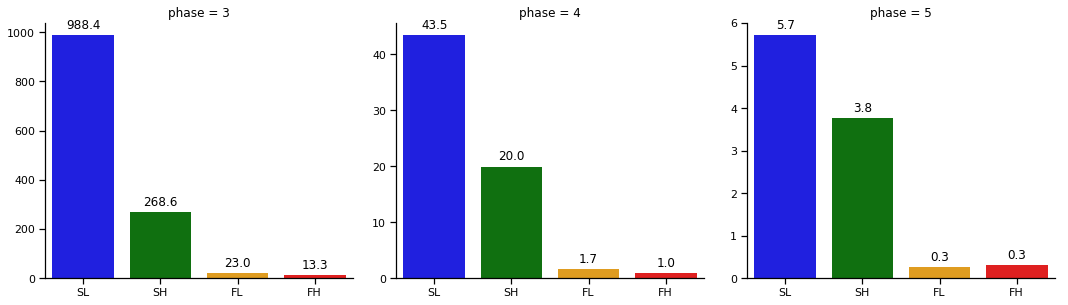

In [40]:
palette = {'SL':'blue', 'SH':'green', 'FL':'orange','FH':'red'}
g = sns.catplot(x='condition',
                col='phase',
                y='N',
                data=df_N.reset_index(),
                kind='bar',
                sharey=False,
                palette=palette)
g.map(annotate)

plt.subplots_adjust(top=0.8)
#g.fig.suptitle('Expected number of ignitions over the entire territory', fontsize=20);

<font size="3">

**Ejercicio 2:** Desplegar y plotear $N_{R,c}^p$ para las diferentes regiones $R$. Hint: Considerar la columna *region* y el argumento *row* en *catplot*
    
</font>

In [7]:
# Dataframe por region, condicion y phase, mantiene estructura inicial
df_region = df[['region', 'condition' ,'phase', 'N']].groupby(['region','condition', 'phase'])

#Suma del N por region, condicion y phase, cambia estructura (filas)
df_region = df_region.agg({'N':np.sum}).reset_index()

df_region.head()

,region,condition,phase,N
0,BIO BIO,SL,3,792.004691
1,BIO BIO,SL,4,34.802083
2,BIO BIO,SL,5,4.559554
3,BIO BIO,SH,3,161.888435
4,BIO BIO,SH,4,11.989754


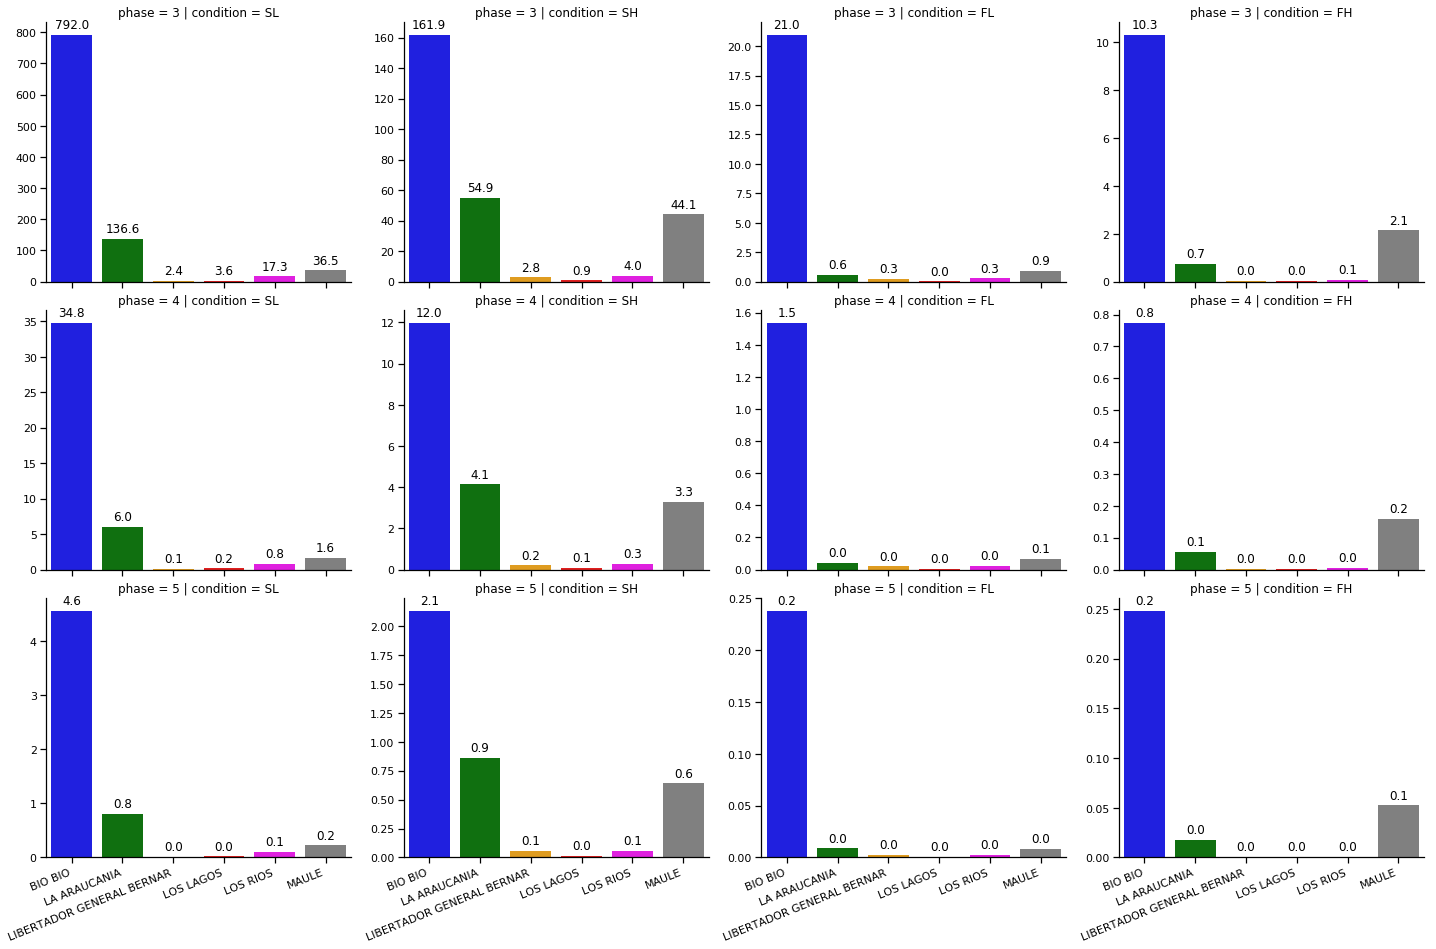

In [38]:
sns.set_context('notebook')
palette = {'BIO BIO':'blue',
           'LA ARAUCANIA':'green',
           'LIBERTADOR GENERAL BERNAR':'orange',
           'LOS LAGOS':'red',
           'LOS RIOS': 'magenta',
           'MAULE': 'gray'}
ax = sns.catplot(x='region',
                row = 'phase',
                col='condition',
                y='N',
                data=df_region.reset_index(),
                kind='bar',
                sharey=False,
                palette = palette)

ax.map(annotate)
ax.fig.autofmt_xdate(rotation= 22)

<font size="3">

**Ejercicio 3:** Chequear que los valores en la tabla satisfagan las ecuaciones (1), (2) y (3) en el documento *lab_modelamiento_utfsm* usando el hecho que $L=14$. Hint: considerar que si s1 y s2 son dos series a comparara entonces s1.round(6).equals(s2.round(6)) es verdadero si ambas series son iguales hasta en 6 decimales. Alternativamente usar sns.scatterplot(x=s1, y=s2) y evaluar visualmente si los puntos estan sobre la linea 1:1.
    
</font>

Se cumple


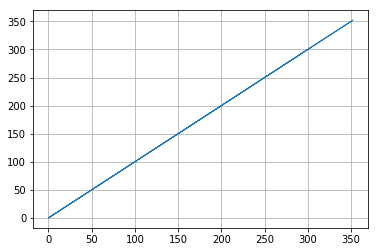

In [8]:
temporadas = 14

if (df['Q'] / temporadas).round(6).equals(df['q'].round(6)) == True:
    print('Se cumple')
    
plt.plot(df['Q'] / temporadas,
         df['q'],
         linewidth = 1)
plt.grid()

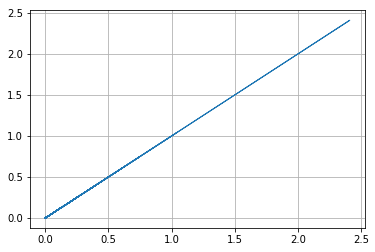

In [9]:
if (df['H'] / df['Q']).round(2).eq(df['h'].round(2)).all() == True:
    print('Se cumple')

plt.plot(df['H'] / df['Q'],
         df['h'],
         linewidth = 1)
plt.grid()

__Nota:__ En ambos casos se puede apreciar el comportamiento 1-1 que tienen ambos valores, por lo que se puede afirmar que se cumple la formula: 

Se cumple


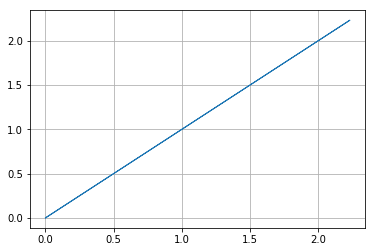

In [10]:
if (df['n']).round(6).equals((df['S'] * df['h']).round(6)) == True:
    print('Se cumple')
    
plt.plot(df['n'],
         df['S'] * df['h'],
         linewidth = 1)
plt.grid()

Se cumple


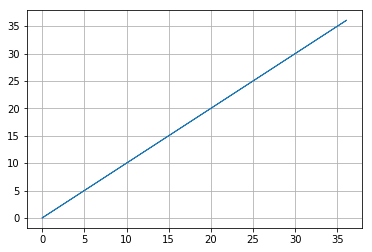

In [11]:
if (df['N']).round(6).equals((df['n'] * df['q']).round(6)) == True:
    print('Se cumple')
    
plt.plot(df['N'],
         df['n'] * df['q'],
         linewidth = 1)
plt.grid()

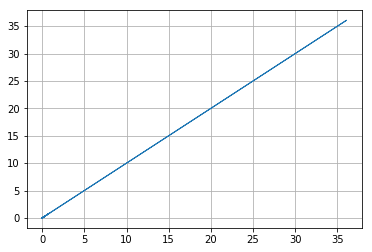

In [12]:
if (df['N']).round(6).equals((df['H'] * df['S'] / temporadas).round(6)) == True:
    print('Se cumple')

plt.plot((df['H'] * df['S']) / temporadas,
         df['N'],
         linewidth = 1)
plt.grid()

__Nota:__ Finalmente, se puede afirmar que estas últimas formulas, y todas las anteriores, se cumplen en todos los casos.

<font size="3">

**Ejercicio 4:** Explorar la distribución de las variables mencionadas  en el documento *lab_modelamiento_utfsm*.
    
</font>

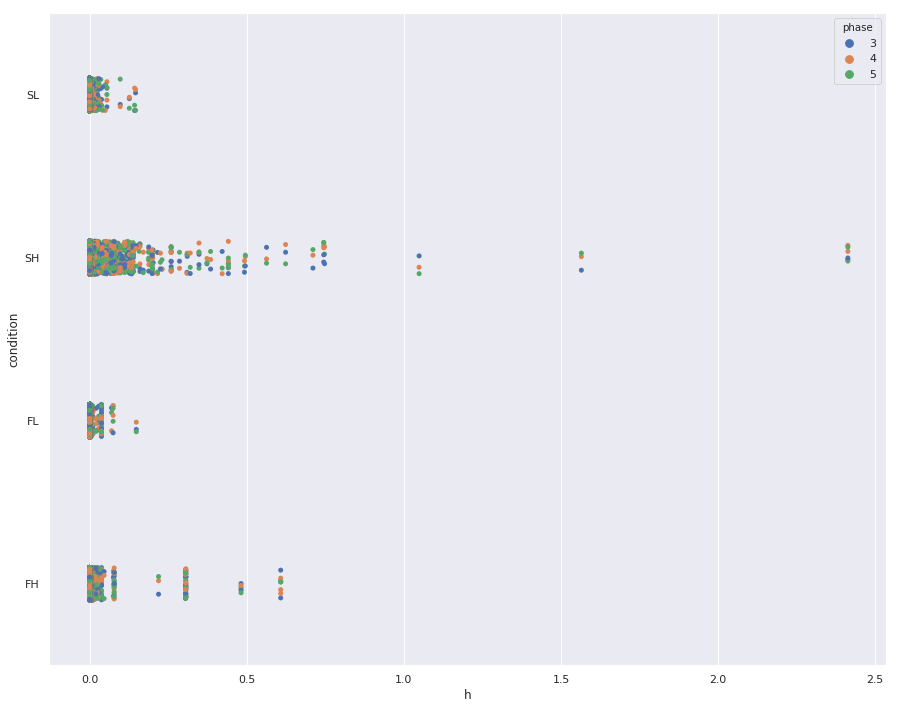

In [13]:
sns.set(rc={'figure.figsize':(15,12)})
g = sns.stripplot(x = 'h',
                  y = 'condition',
                  hue = 'phase',
                  data = df)

[None]

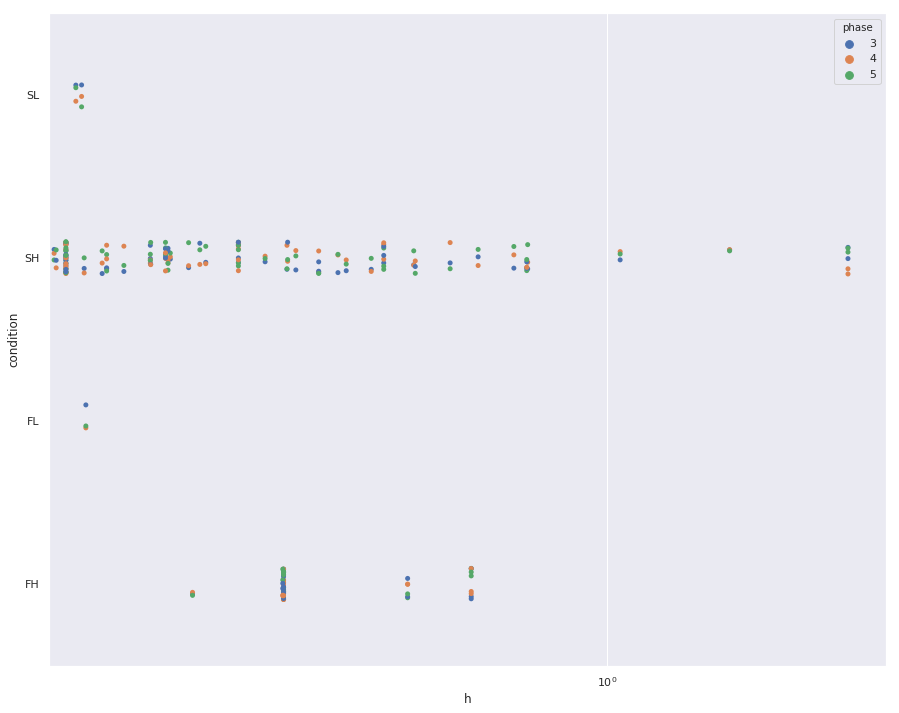

In [14]:
#Escalado a log, el grafico anterior
g = sns.stripplot(x = 'h',
                  y = 'condition',
                  hue = 'phase',
                  data = df)
g.set(xscale = "log")

[None]

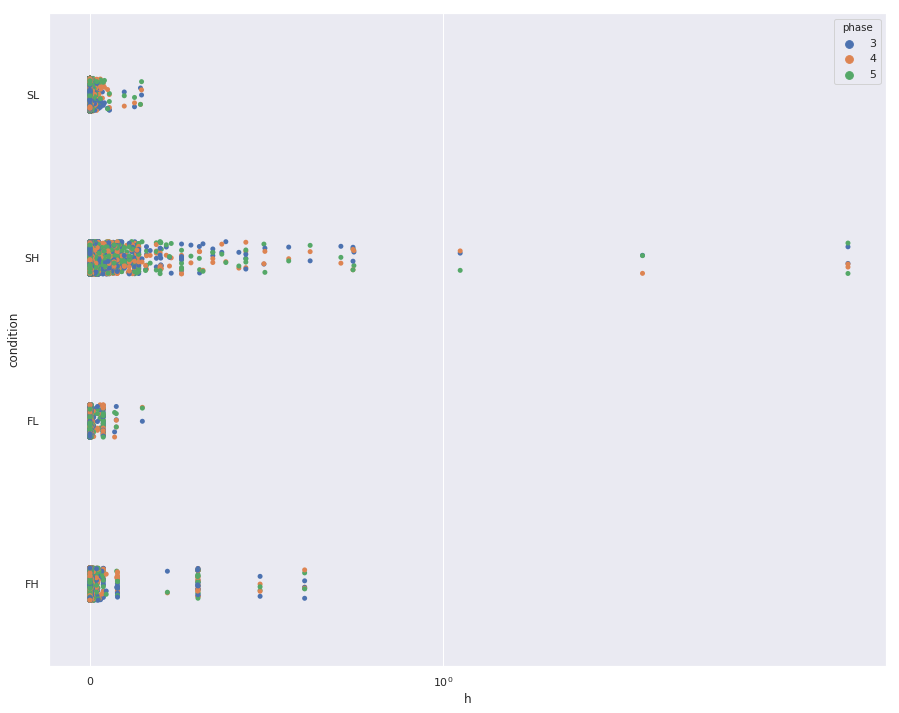

In [15]:
#Escalado a symlog, el grafico anterior
g = sns.stripplot(x = 'h',
                  y = 'condition',
                  hue = 'phase',
                  data = df)
g.set(xscale = "symlog")

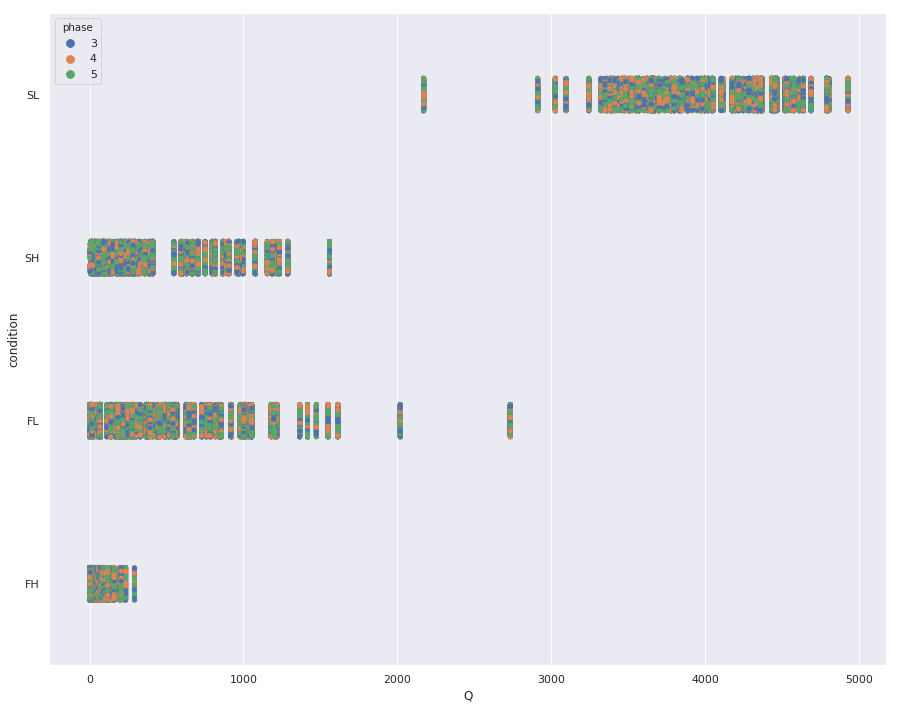

In [16]:
g = sns.stripplot(x = 'Q',
                  y = 'condition',
                  hue = 'phase',
                  data = df)

[None]

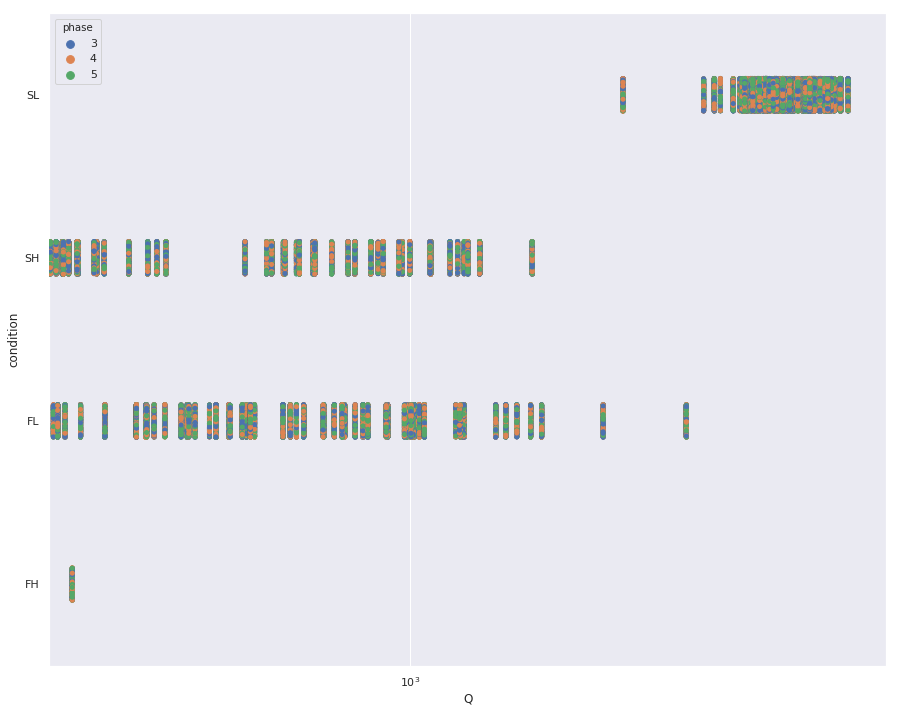

In [17]:
#Escalado a log, el grafico anterior
g = sns.stripplot(x = 'Q',
                  y = 'condition',
                  hue = 'phase',
                  data = df)
g.set(xscale = "log")

[None]

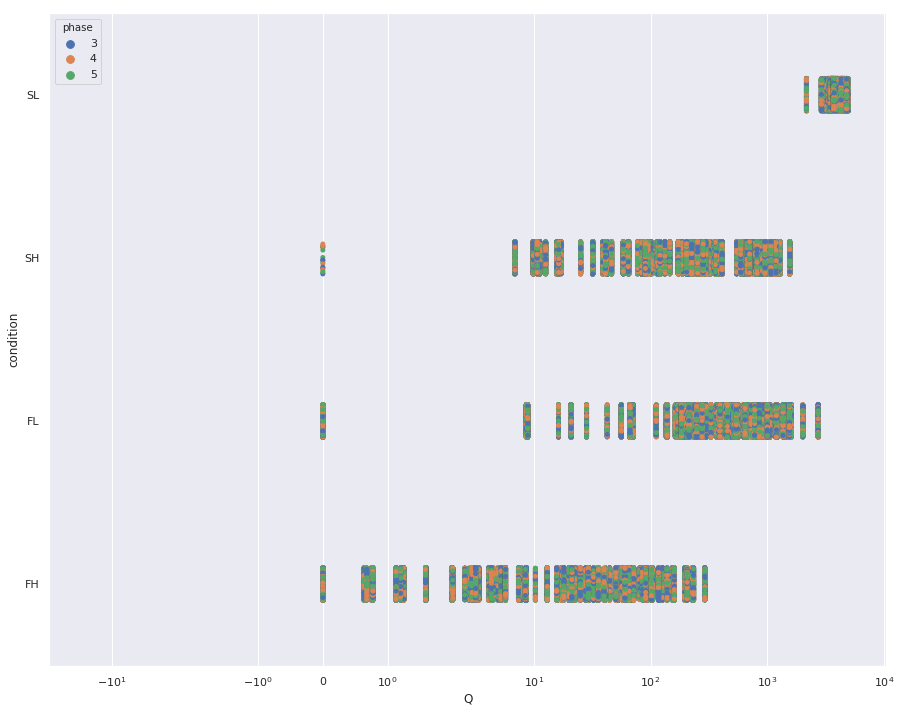

In [18]:
#Escalado a symlog, el grafico anterior
g = sns.stripplot(x = 'Q',
                  y = 'condition',
                  hue = 'phase',
                  data = df)
g.set(xscale = "symlog")

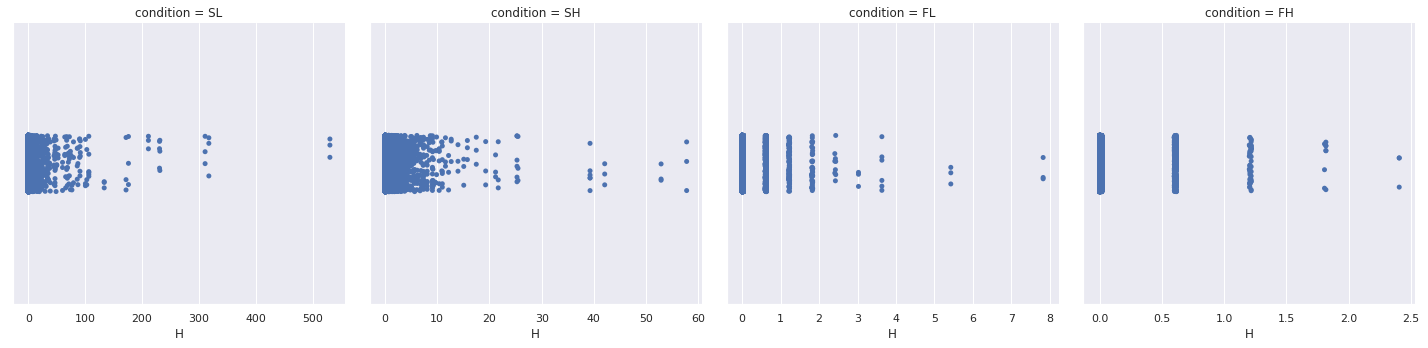

In [19]:
g = sns.catplot(x = 'H',
                col = 'condition',
                data = df,
                sharex = False)

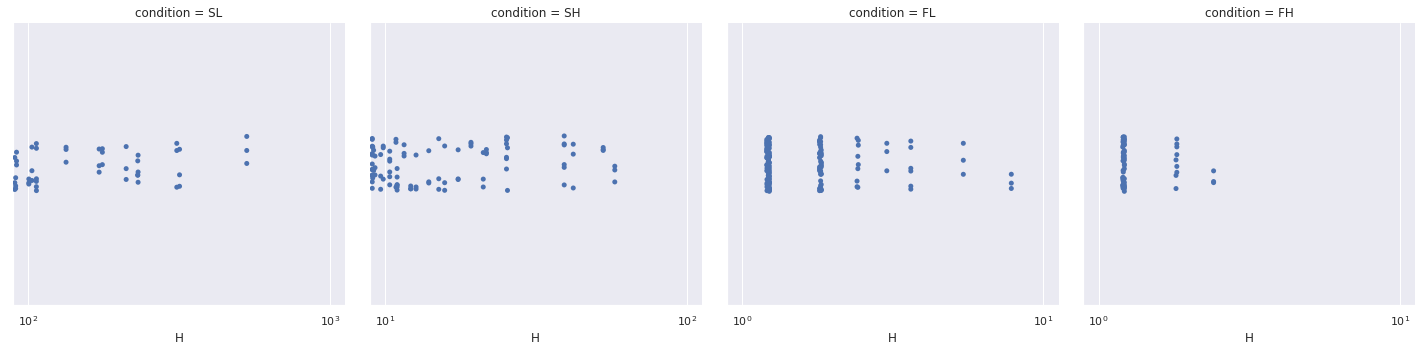

In [20]:
#Escalado a log, el grafico anterior
g = sns.catplot(x = 'H',
                col = 'condition',
                data = df,
                sharex = False)
g.set(xscale = "log")

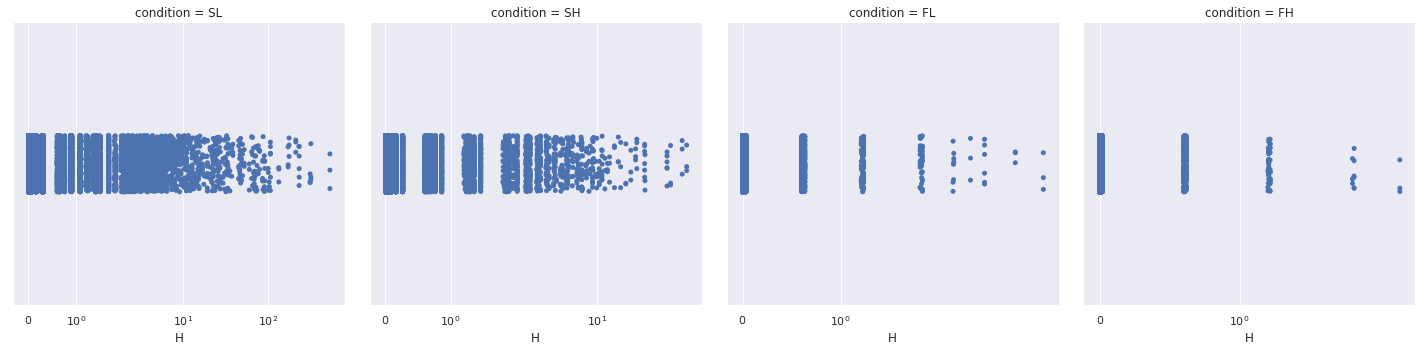

In [21]:
#Escalado a symlog, el grafico anterior
g = sns.catplot(x = 'H',
                col = 'condition',
                data = df,
                sharex = False)
g.set(xscale = 'symlog')

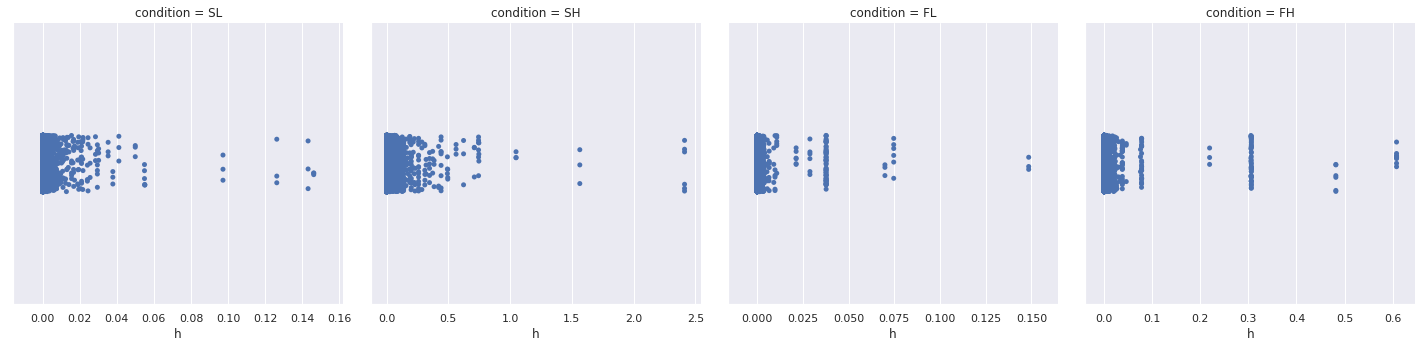

In [22]:
g = sns.catplot(x = 'h',
            sharex = False,
            col = 'condition',
            data = df)

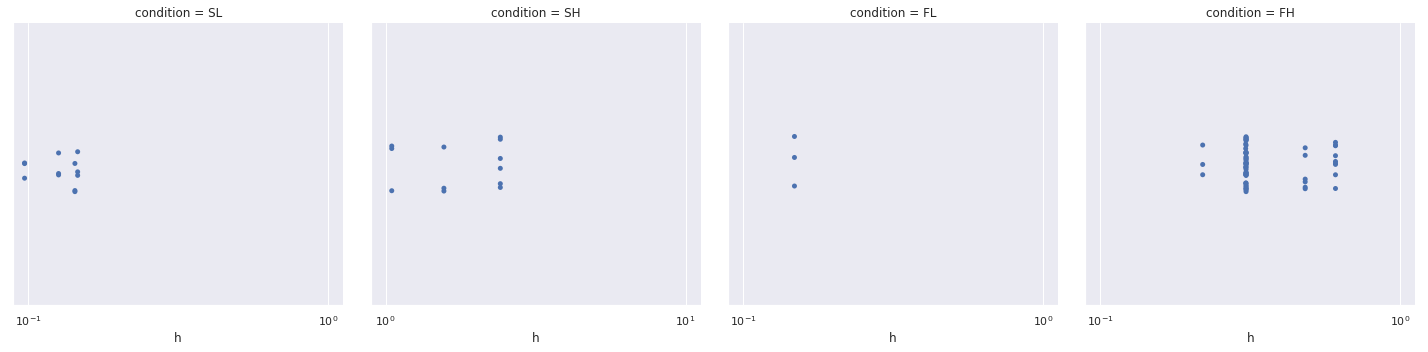

In [23]:
#Escalado a log, el grafico anterior
g = sns.catplot(x = 'h',
            sharex = False,
            col = 'condition',
            data = df)
g.set(xscale = "log")

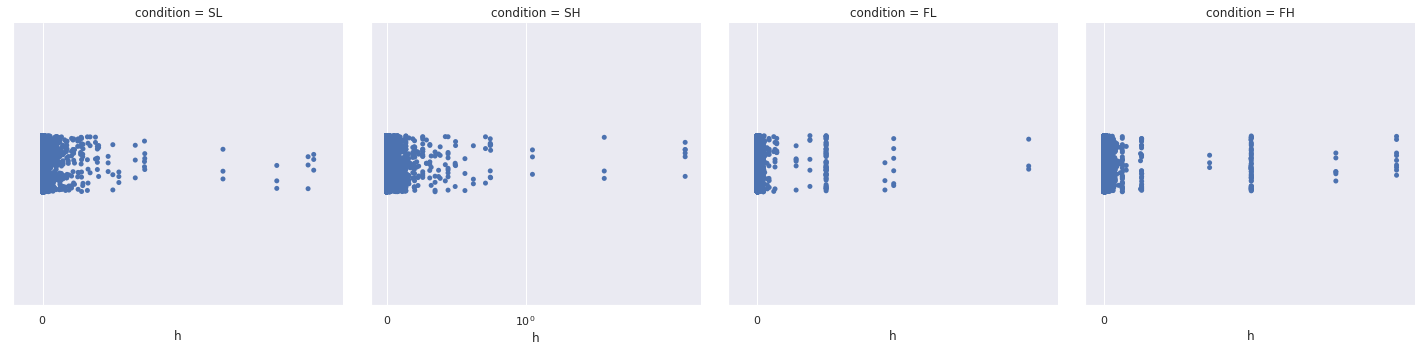

In [24]:
#Escalado a symlog, el grafico anterior
g = sns.catplot(x = 'h',
            sharex = False,
            col = 'condition',
            data = df)
g.set(xscale = "symlog")

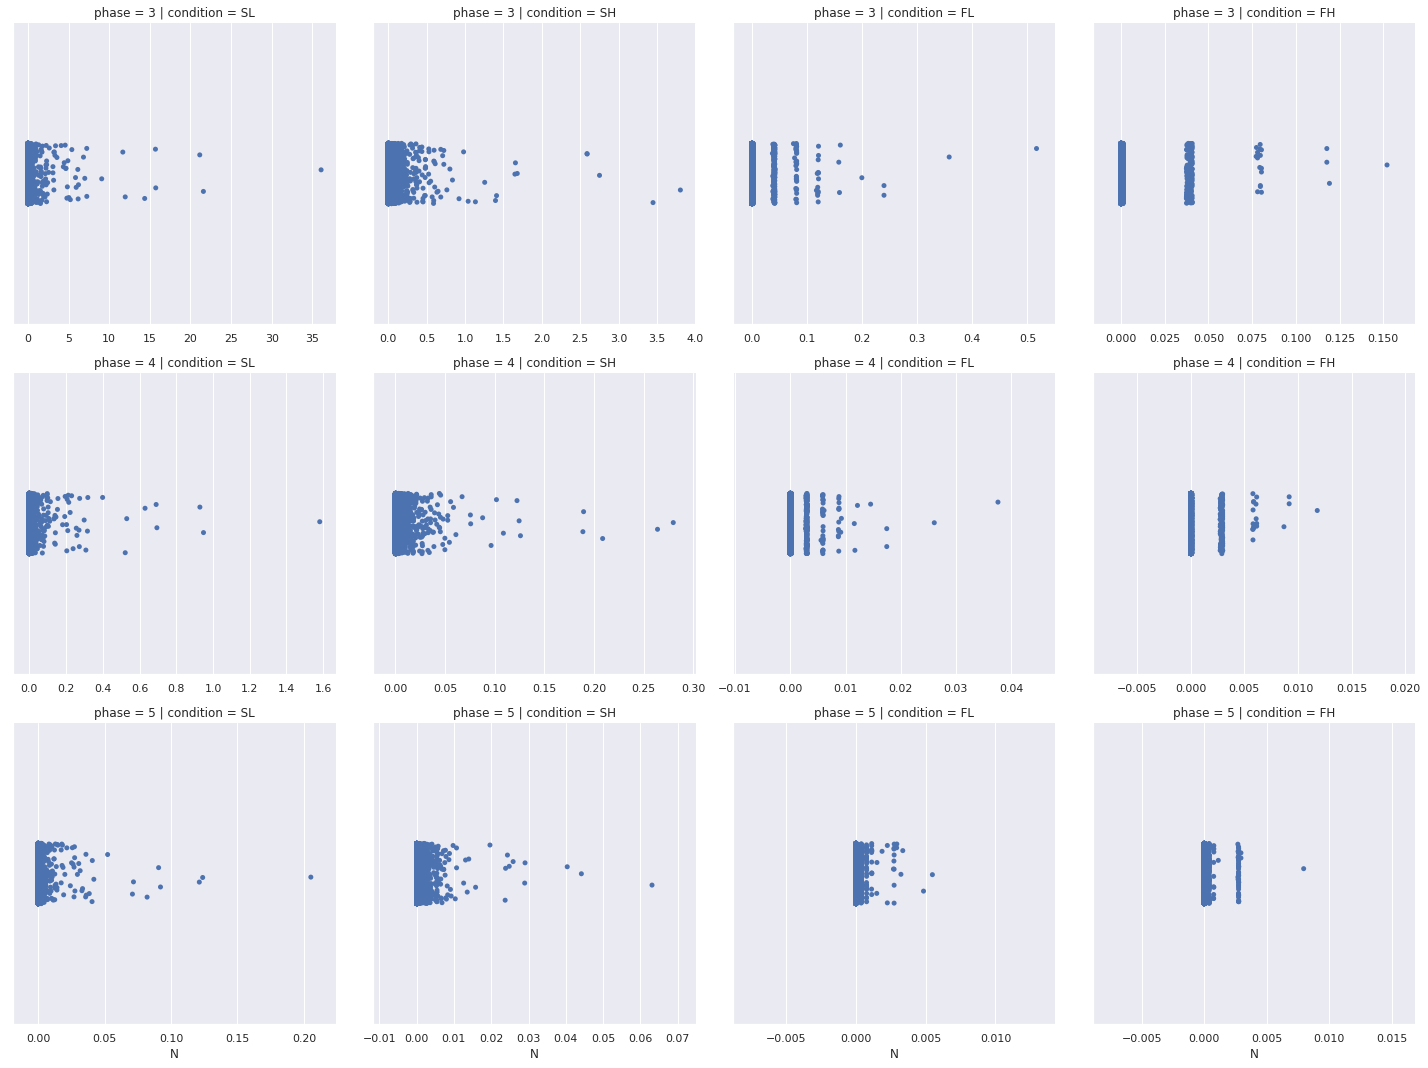

In [25]:
g = sns.catplot(x = 'N',
                row = 'phase',
                col = 'condition',
                data = df,
                sharex = False)

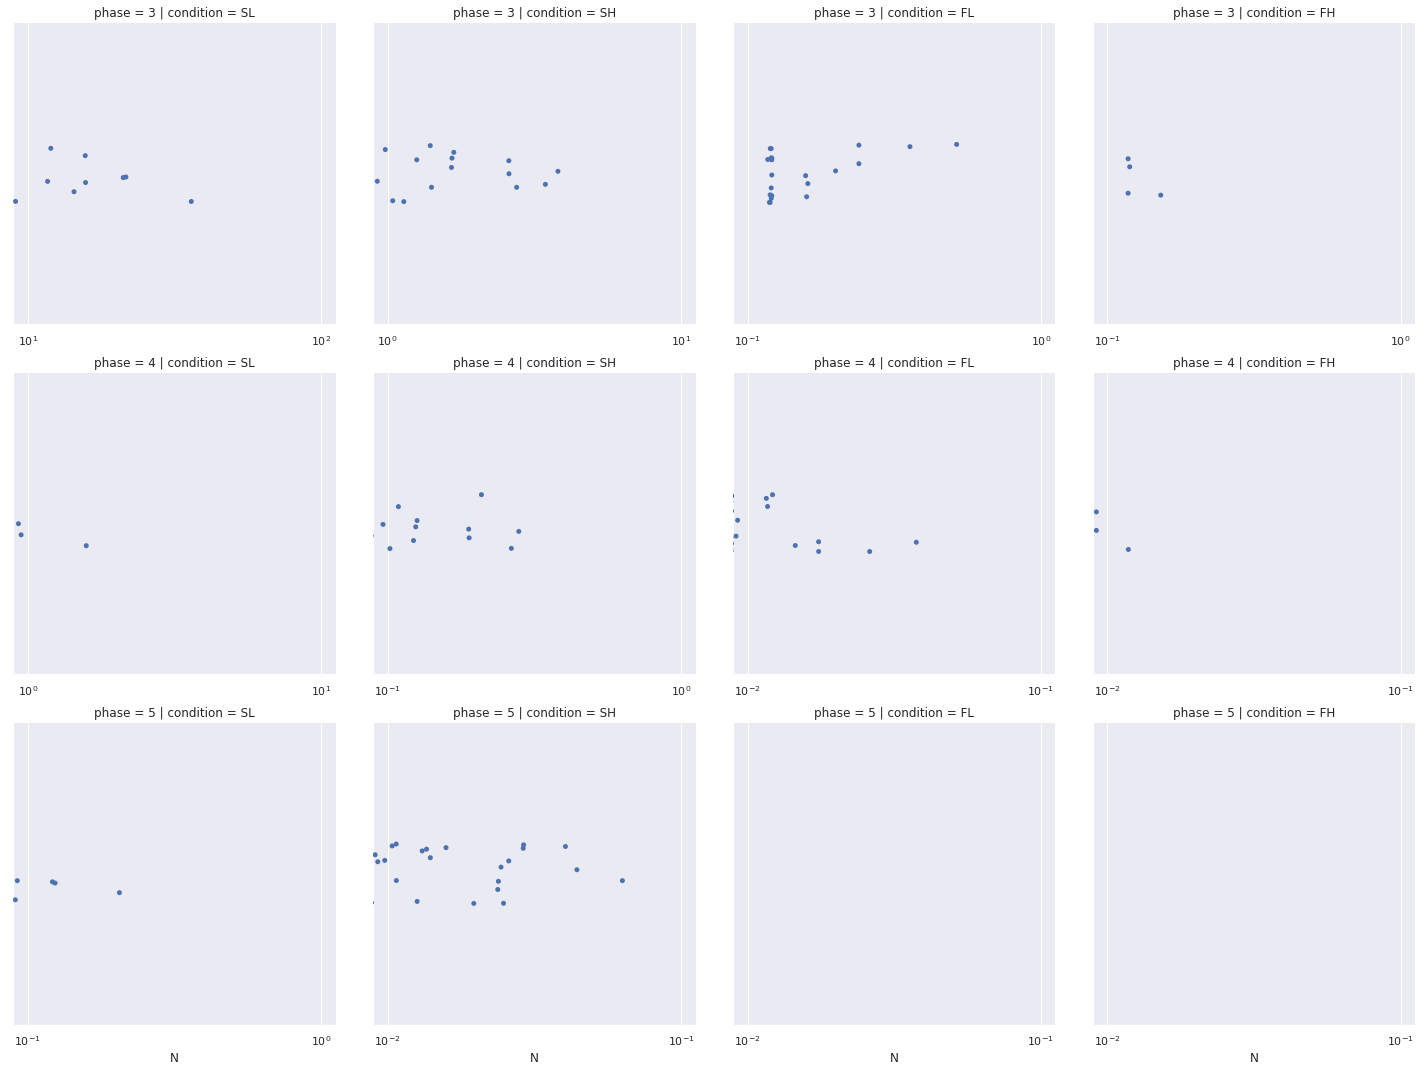

In [26]:
#Escalado a log el grafico anterior
g = sns.catplot(x = 'N',
                row = 'phase',
                col = 'condition',
                data = df,
                sharex = False)
g.set(xscale = "log")

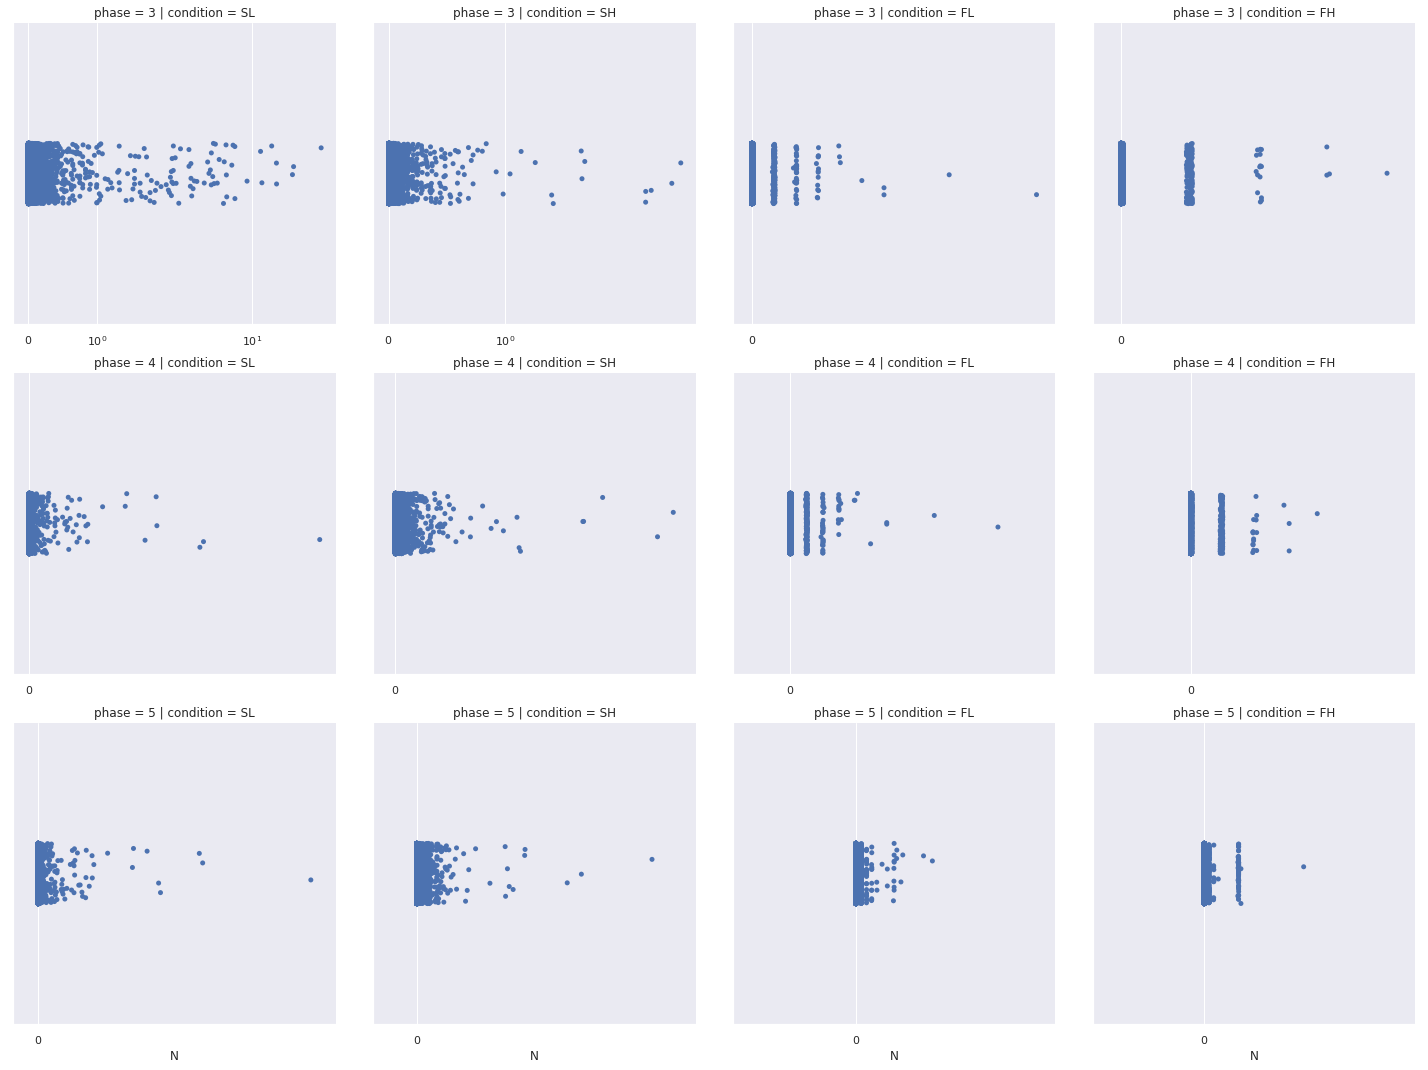

In [27]:
#Escalado a symlog, el grafico anterior
g = sns.catplot(x = 'N',
                row = 'phase',
                col = 'condition',
                data = df,
                sharex = False)
g.set(xscale = "symlog")

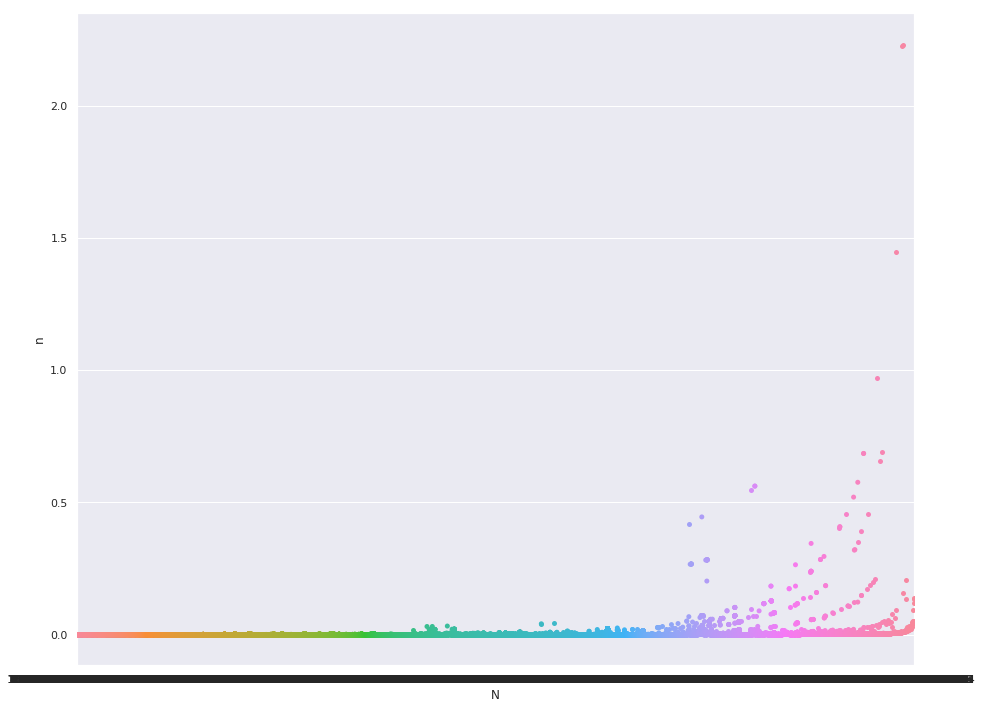

In [28]:
g = sns.stripplot(x = 'N',
                  y = 'n',
                  data = df)

[None]

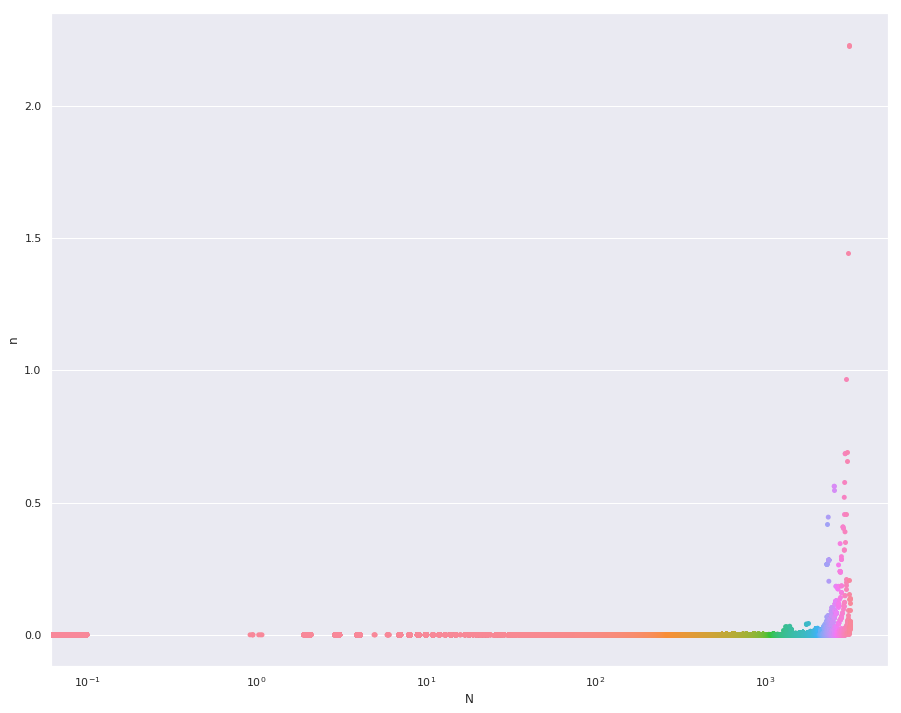

In [29]:
#Escalado a log, el grafico anterior
g = sns.stripplot(x = 'N',
                  y = 'n',
                  data = df)
g.set(xscale = "log")

[None]

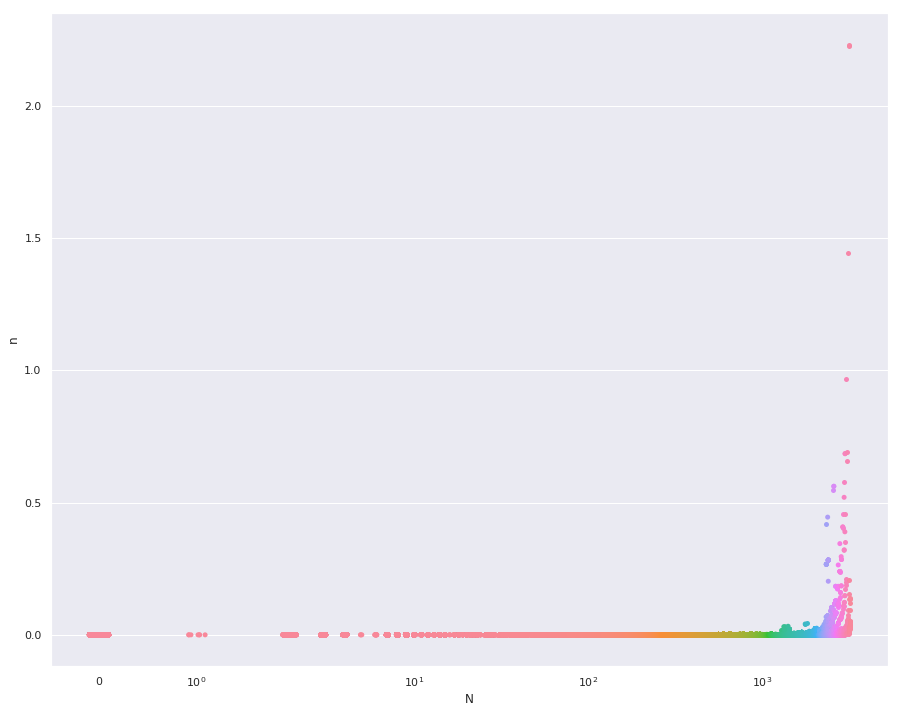

In [30]:
#Escalado a symlog, el grafico anterior
g = sns.stripplot(x = 'N',
                  y = 'n',
                  data = df)
g.set(xscale = "symlog")

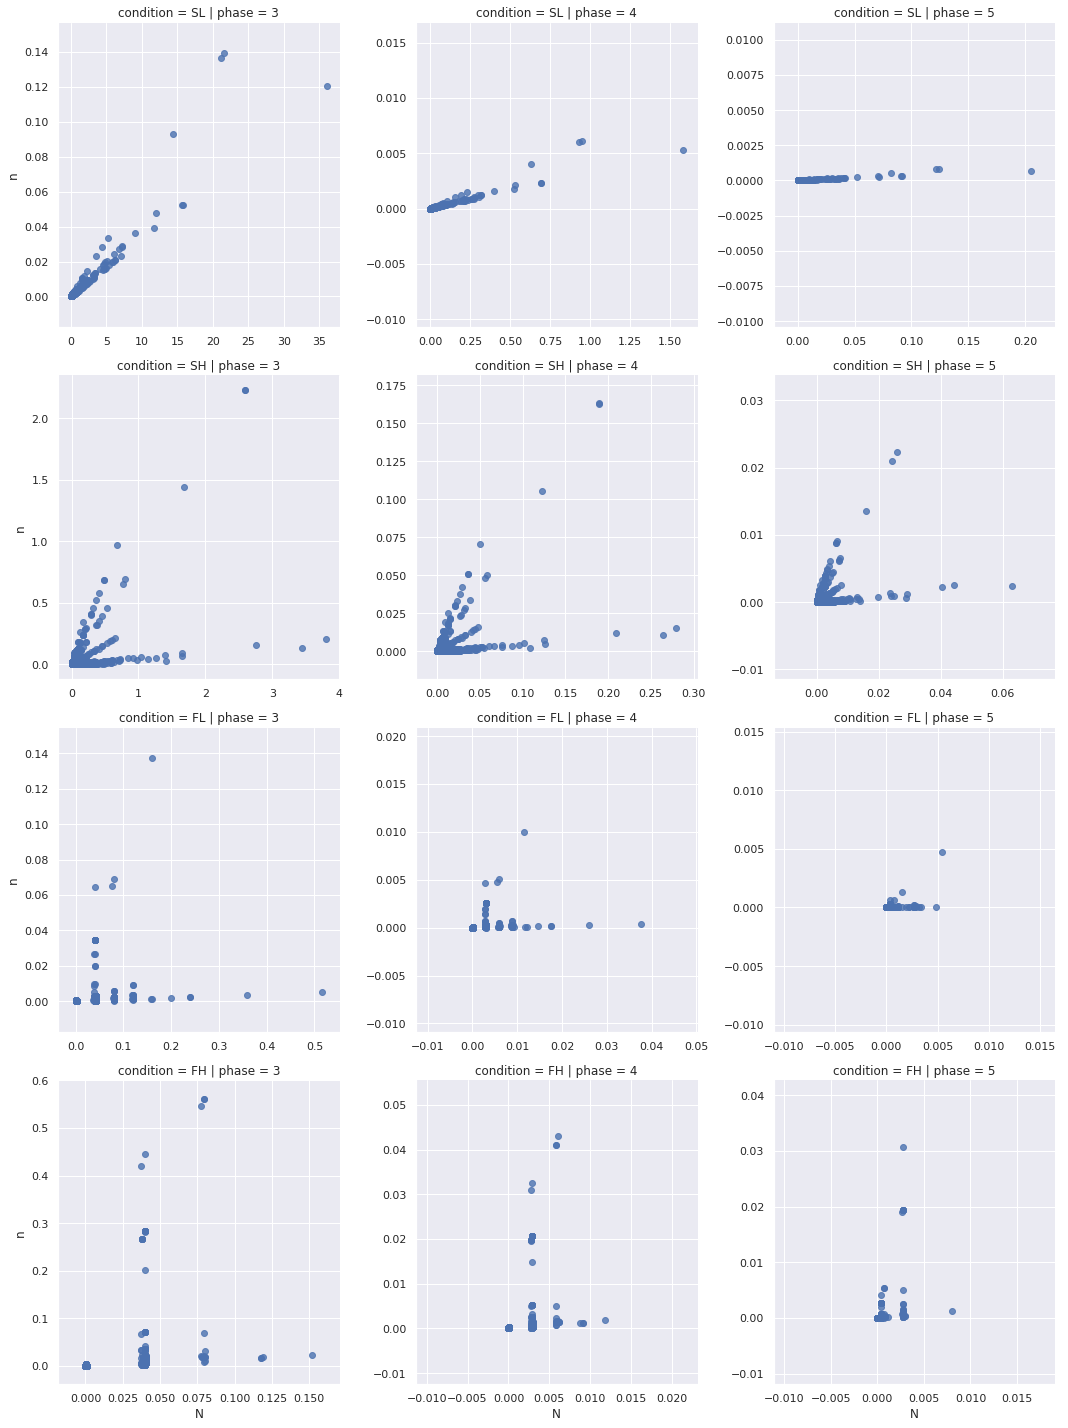

In [31]:
# n y N

sns.lmplot(x = 'N', y = 'n',
           row = 'condition',
           col = 'phase',
           data = df,
           sharey = False,
           sharex = False,
           fit_reg = False)

In [29]:
sns.set_context('talk')

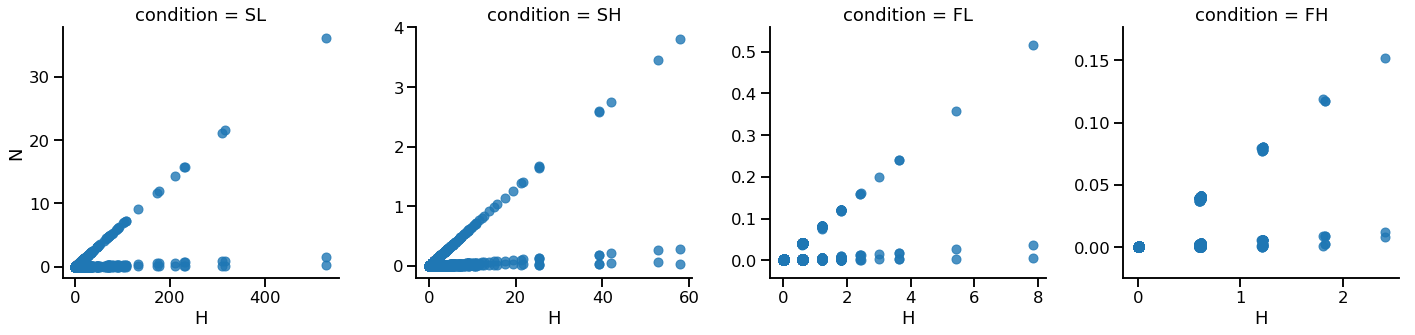

In [30]:
# H y N

sns.lmplot(x = 'H', y = 'N',
           col = 'condition',
           data = df,
           sharey = False,
           sharex = False,
           fit_reg = False)

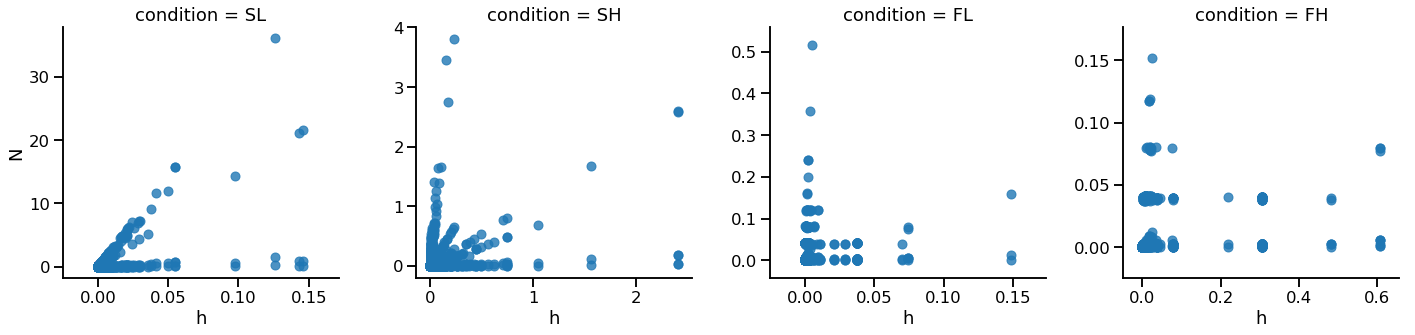

In [31]:
# h y N 

sns.lmplot(x = 'h', y = 'N',
           col = 'condition',
           data = df,
           sharey = False,
           sharex = False,
           fit_reg = False)

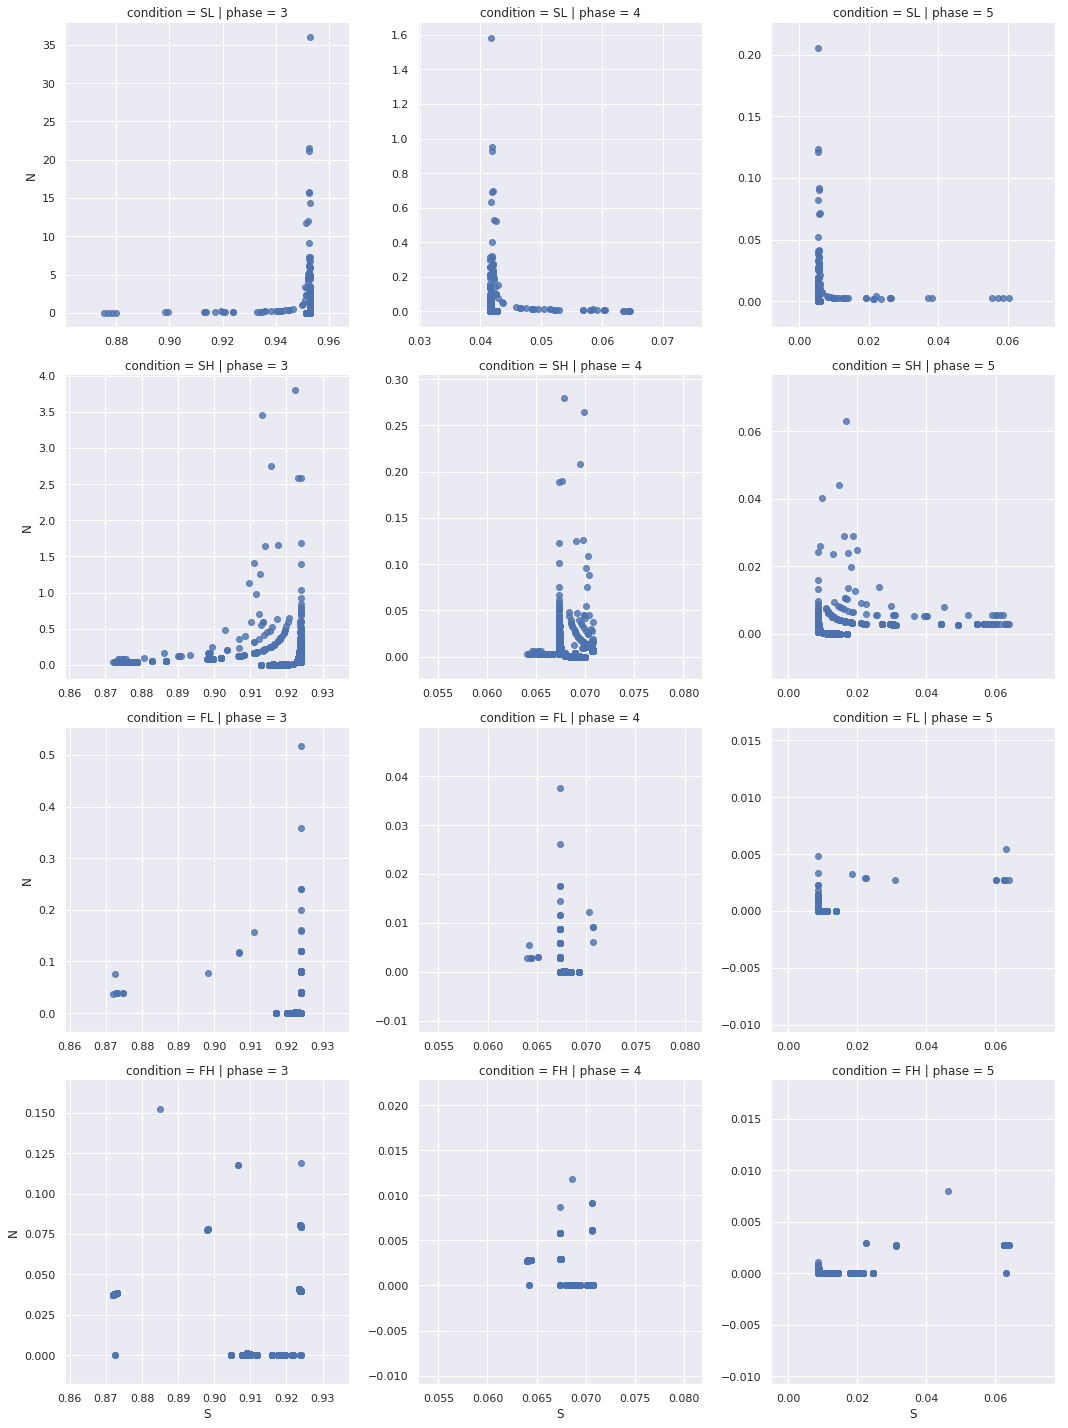

In [34]:
# S y N

sns.lmplot(x = 'S', y = 'N',
           row = 'condition',
           col = 'phase',
           data = df,
           sharey = False,
           sharex = False,
           fit_reg = False)

In [35]:
regiones = []
for region in palette.keys():
    regiones.append(df[df['region'] == region])

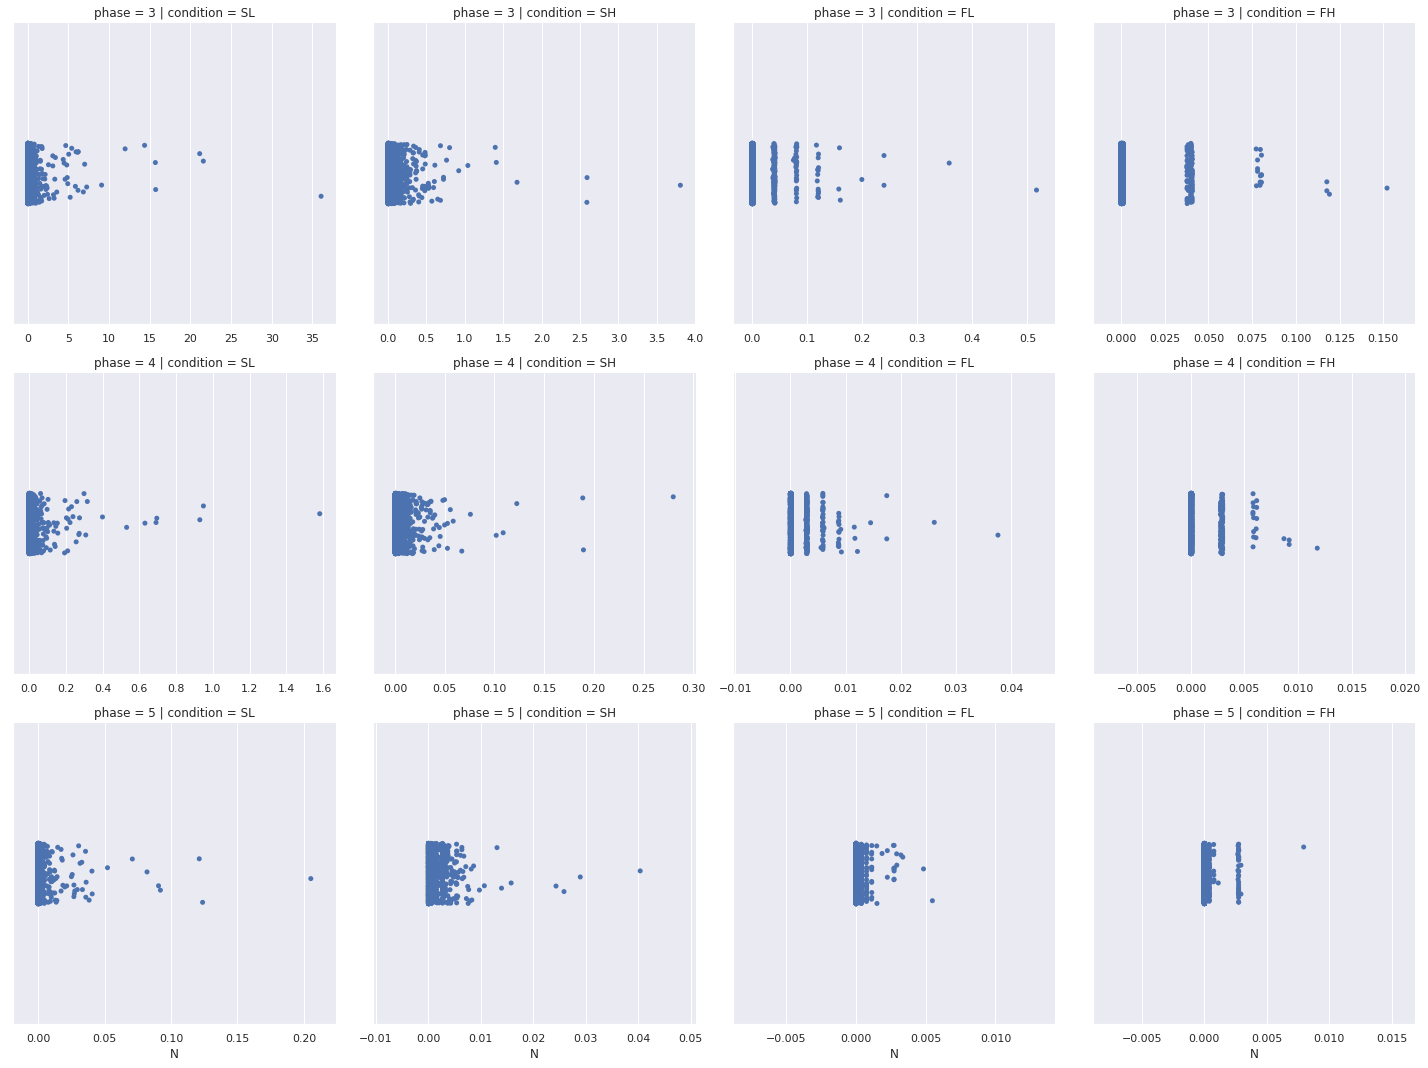

In [36]:
g = sns.catplot(x = 'N',
            row = 'phase',
            col = 'condition',
            data = regiones[0],
            sharex = False)

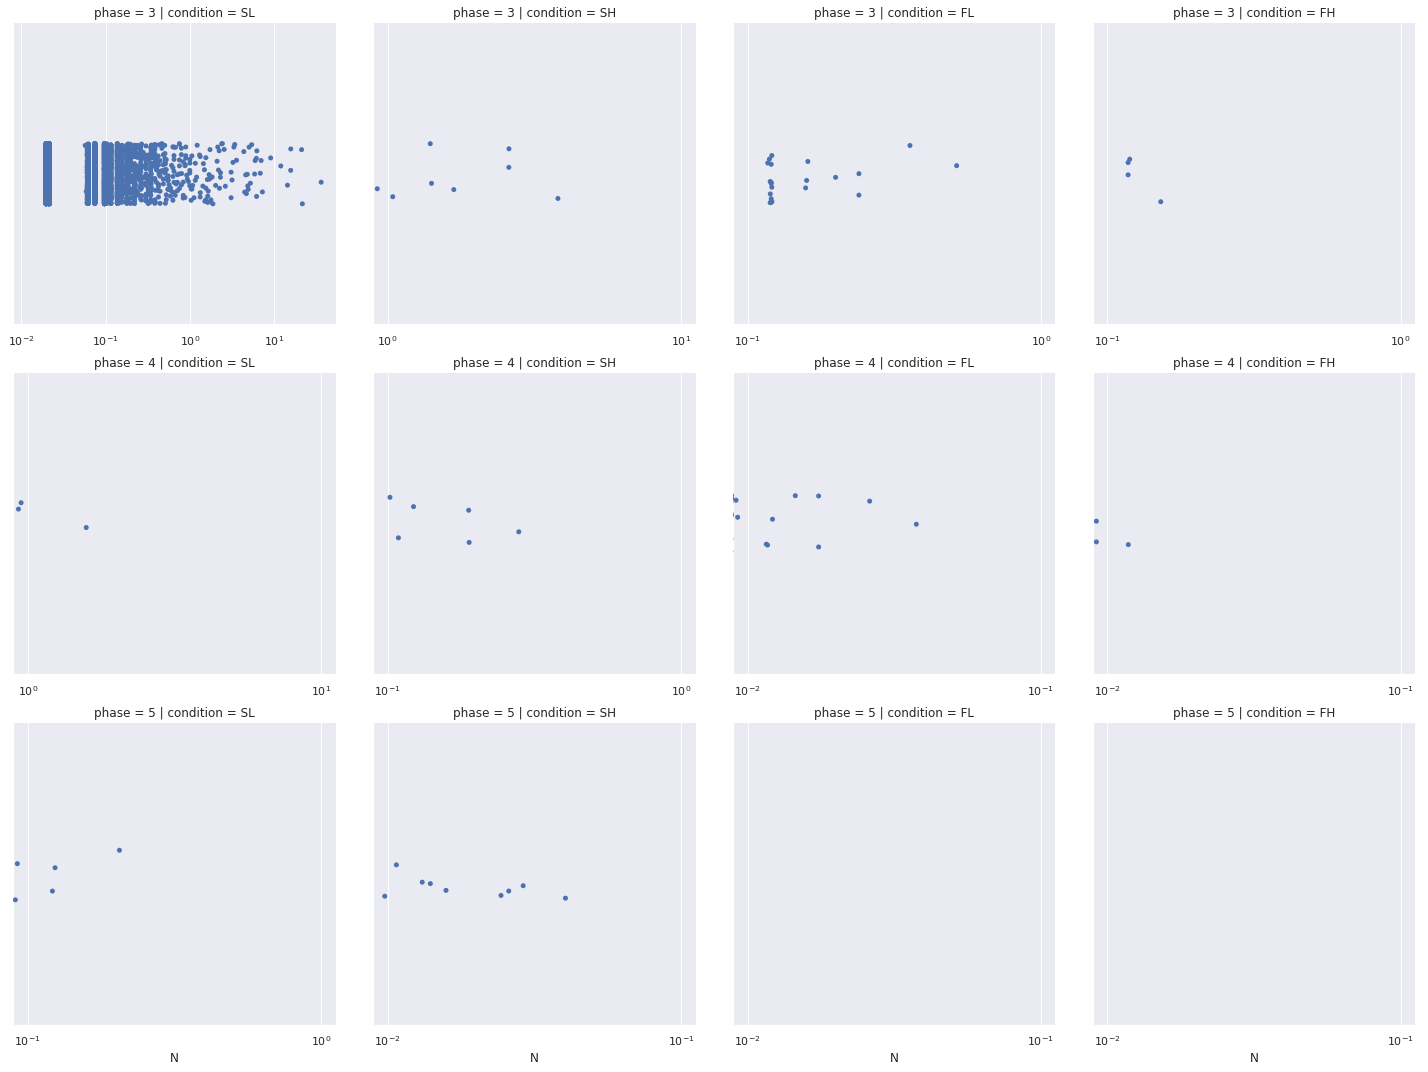

In [37]:
#Escalado log grafico anterior
g = sns.catplot(x = 'N',
            row = 'phase',
            col = 'condition',
            data = regiones[0],
            sharex = False)
g.set(xscale = "log")

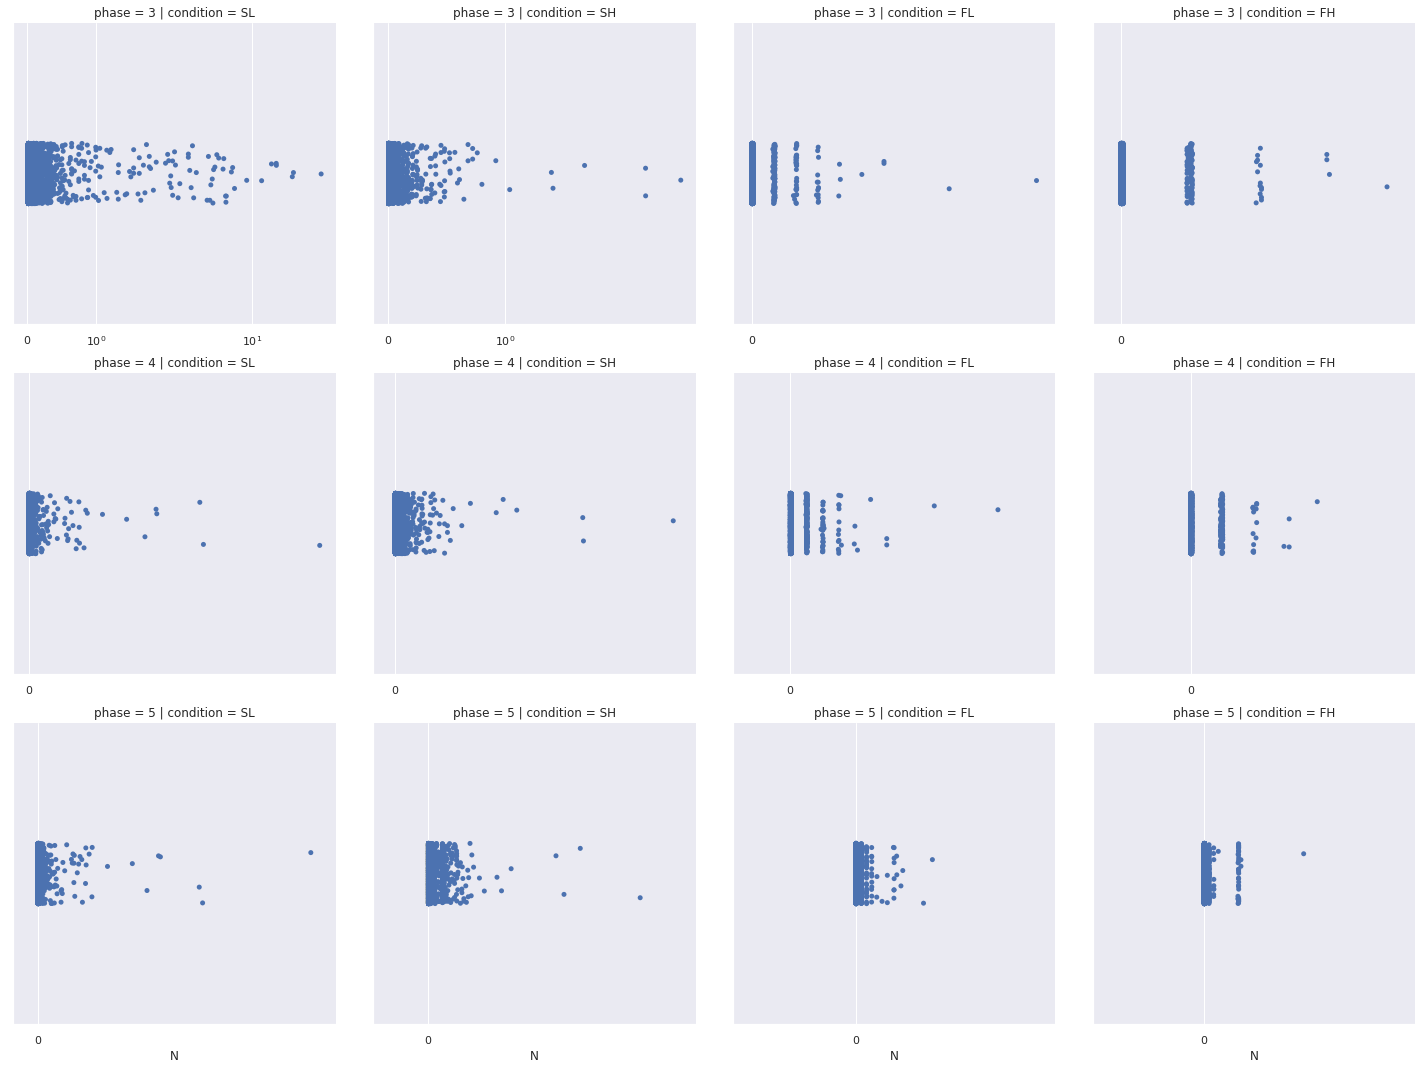

In [38]:
#Escalado a symlog, el grafico anterior
g = sns.catplot(x = 'N',
            row = 'phase',
            col = 'condition',
            data = regiones[0],
            sharex = False)
g.set(xscale = "symlog")

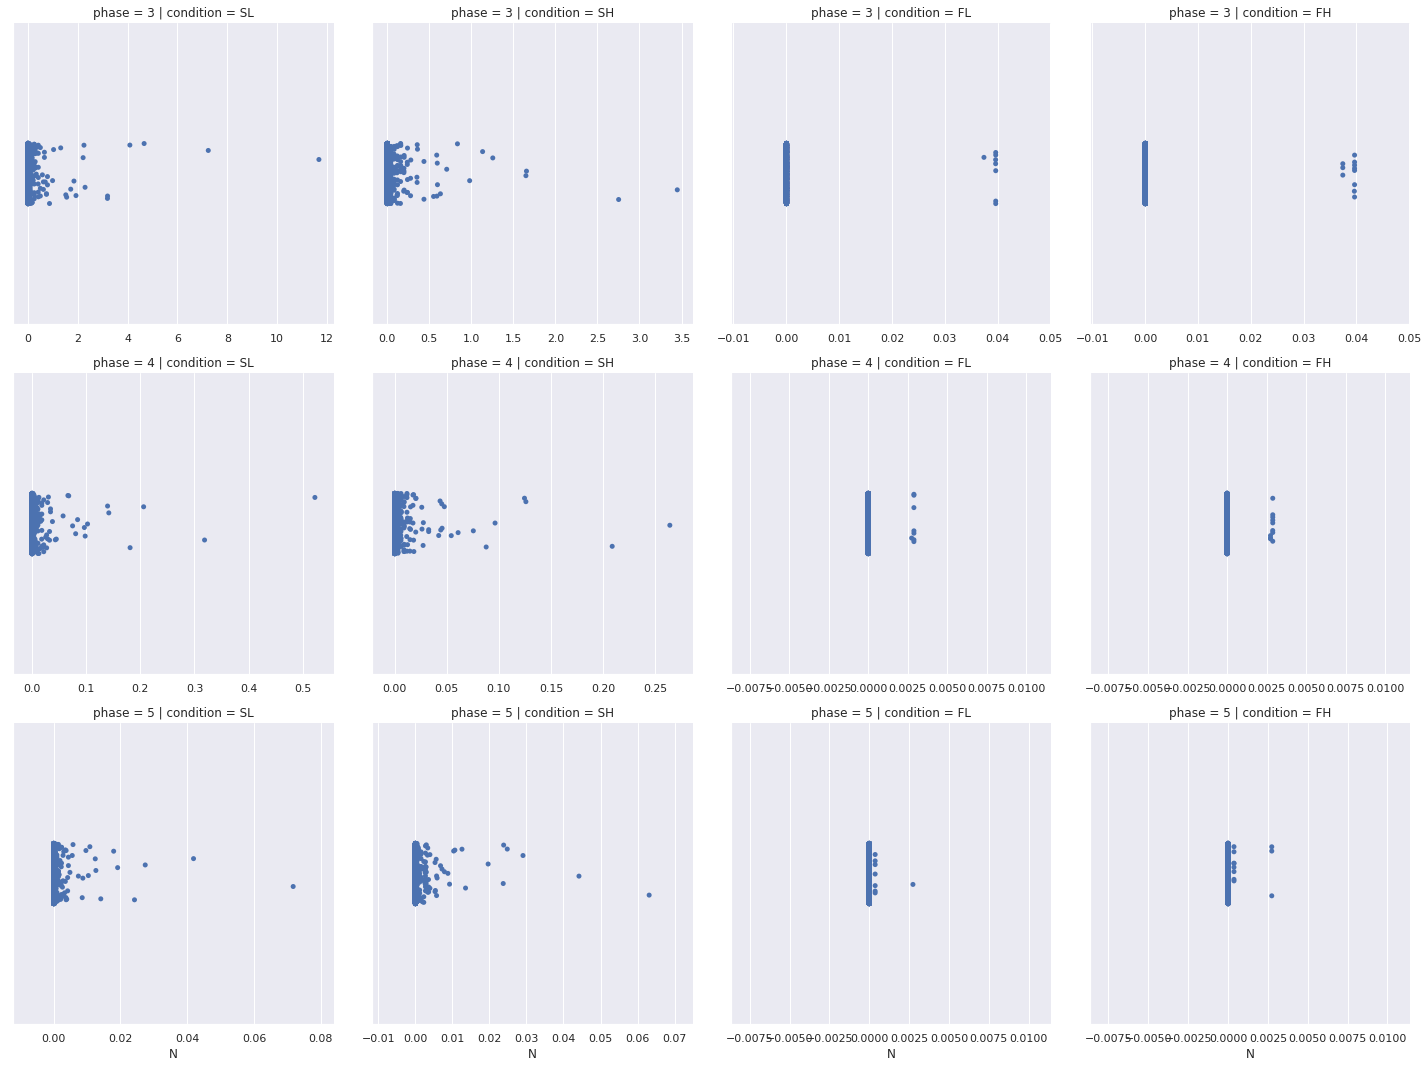

In [39]:
g = sns.catplot(x = 'N',
            row = 'phase',
            col = 'condition',
            data = regiones[1],
            sharex = False)

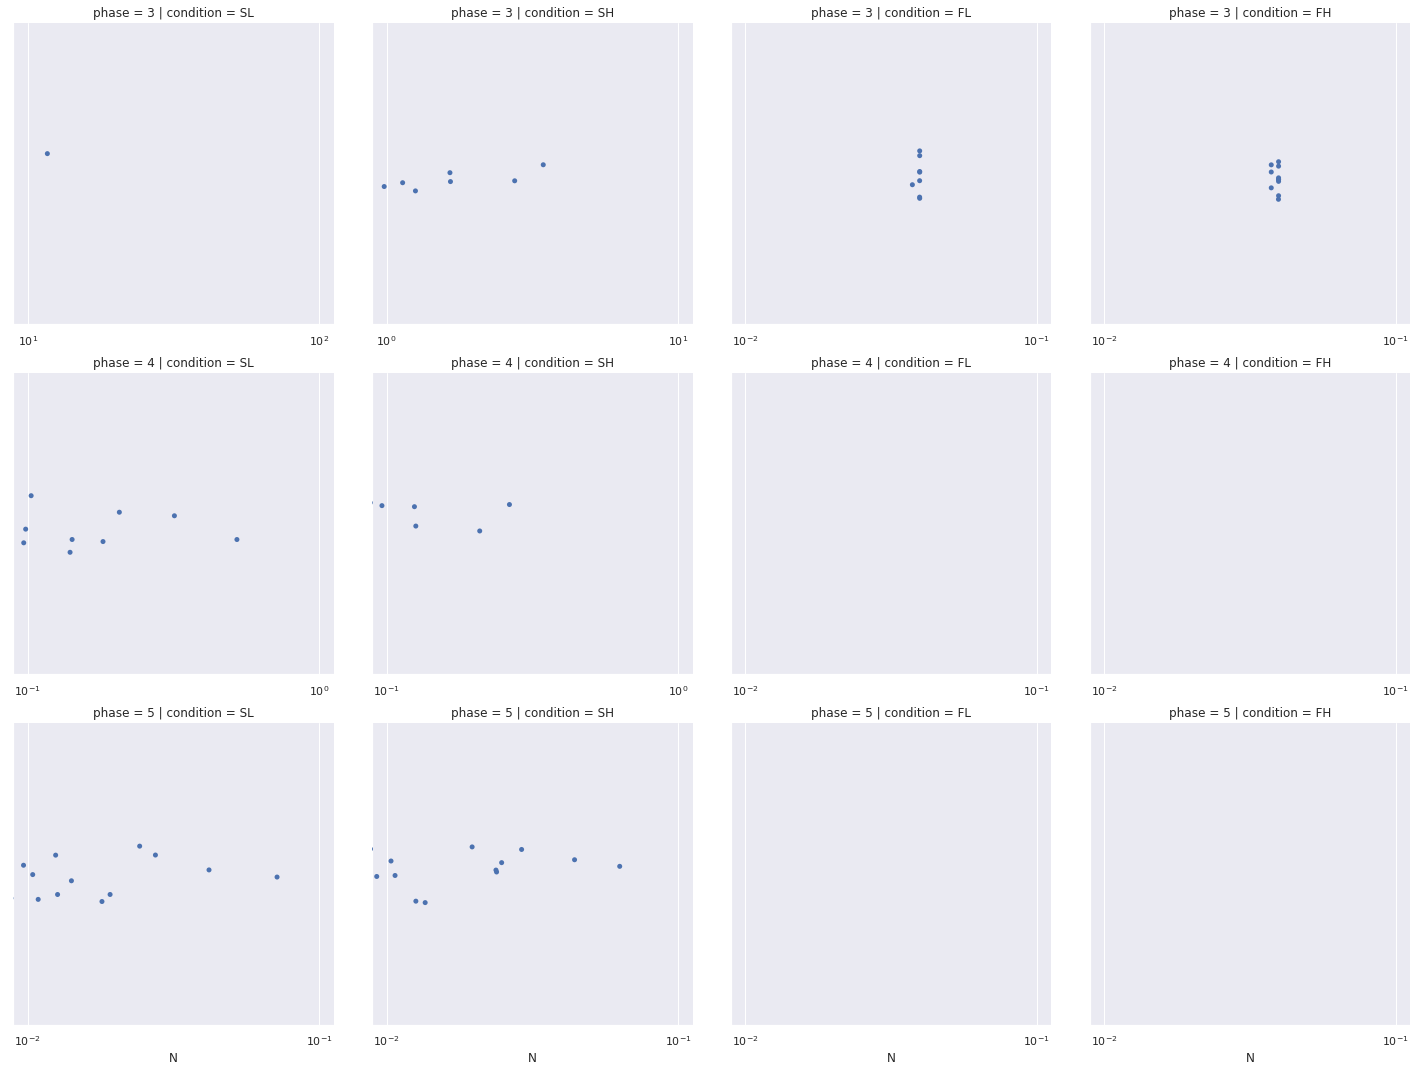

In [40]:
#Escalado log grafico anterior
g = sns.catplot(x = 'N',
            row = 'phase',
            col = 'condition',
            data = regiones[1],
            sharex = False)
g.set(xscale = "log")

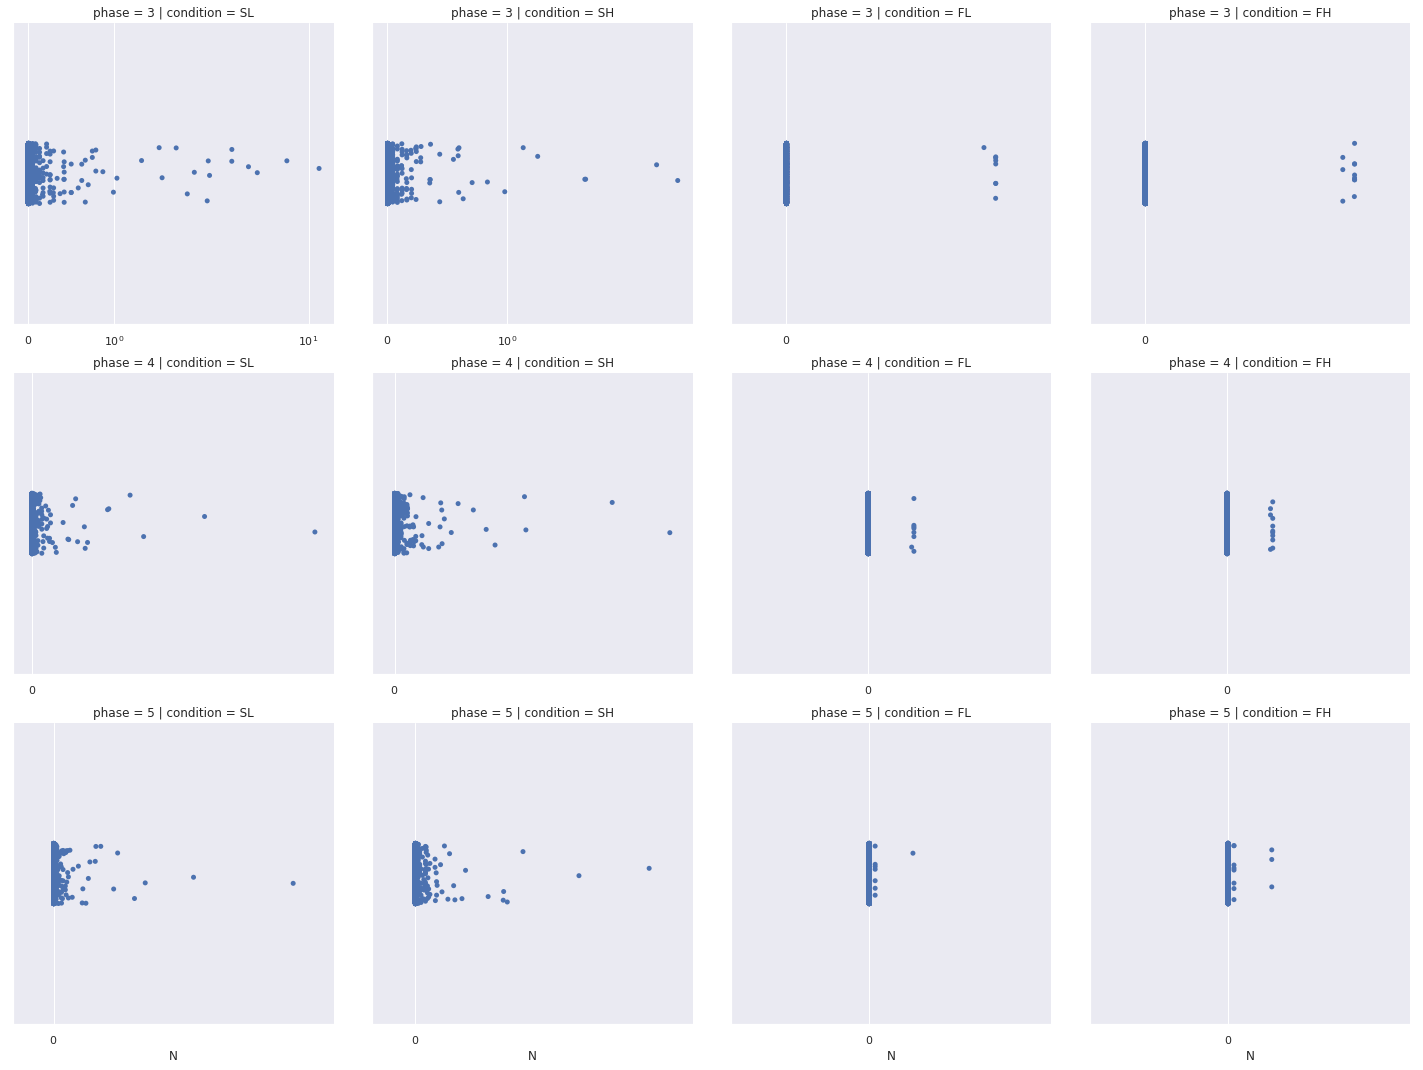

In [41]:
#Escalado a symlog, el grafico anterior
g = sns.catplot(x = 'N',
            row = 'phase',
            col = 'condition',
            data = regiones[1],
            sharex = False)
g.set(xscale = "symlog")